In [1]:
import pandas as pd
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
ipl_auction_df = pd.read_csv('IPLData.csv')

In [3]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [4]:
X_features

['AGE',
 'COUNTRY',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL']

In [50]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [51]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

Allrounder  Batsman  Bowler  W. Keeper
0           1        0       0          0
1           0        0       1          0
2           0        0       1          0
3           0        0       1          0
4           0        1       0          0

In [52]:
categorical_features = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [53]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features] , columns = categorical_features, drop_first = True)

In [54]:
ipl_auction_encoded_df

T-RUNS  T-WKTS  ODI-RUNS-S  ODI-SR-B  ODI-WKTS  ODI-SR-BL  RUNS-S  HS  \
0         0       0           0      0.00         0        0.0       0   0   
1       214      18         657     71.41       185       37.6       0   0   
2       571      58        1269     80.62       288       32.9     167  39   
3       284      31         241     84.56        51       36.8      58  11   
4        63       0          79     45.93         0        0.0    1317  71   
..      ...     ...         ...       ...       ...        ...     ...  ..   
125       0       0           0      0.00         0        0.0      49  16   
126    6398       7        6814     75.78         3       86.6       3   3   
127    1775       9        8051     87.58       109       44.3    1237  66   
128    1114     288         790     73.55       278       35.4      99  23   
129     288      64         343     95.81       108       39.4      11  10   

       AVE    SR-B  ...  COUNTRY_NZ  COUNTRY_PAK  COUNTRY_SA  COUNTRY_SL  \
0     0.00    0.00  ...           0            0           1           0   
1     0.00    0.00  ...           0            0           0           0   
2    18.56  121.01  ...           0            0           0           0   
3     5.80   76.32  ...           0            0           0           0   
4    32.93  120.71  ...           0            0           0           0   
..     ...     ...  ...         ...          ...         ...         ...   
125   9.80  125.64  ...           0            0           0           0   
126   3.00   42.85  ...           0            1           0           0   
127  26.32  131.88  ...           0            0           0           0   
128   9.90   91.67  ...           0            0           0           0   
129  11.00  122.22  ...           0            0           0           1   

     COUNTRY_WI  COUNTRY_ZIM  PLAYING ROLE_Batsman  PLAYING ROLE_Bowler  \
0             0            0                     0                    0   
1             0            0                     0                    1   
2             0            0                     0                    1   
3             0            0                     0                    1   
4             0            0                     1                    0   
..          ...          ...                   ...                  ...   
125           0            0                     1                    0   
126           0            0                     1                    0   
127           0            0                     1                    0   
128           0            0                     0                    1   
129           0            0                     0                    1   

     PLAYING ROLE_W. Keeper  CAPTAINCY EXP_1  
0                         0                0  
1                         0                0  
2                         0                0  
3                         0                0  
4                         0                0  
..                      ...              ...  
125                       0                0  
126                       0                1  
127                       0                1  
128                       0                0  
129                       0                0  

[130 rows x 31 columns]

In [55]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [56]:
X_features = ipl_auction_encoded_df.columns

In [57]:
X_features


Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [58]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [59]:
X = sm.add_constant(ipl_auction_encoded_df)
Y = ipl_auction_df['SOLD PRICE']

In [60]:
train_X,test_X , train_y, test_y = train_test_split(X,Y,train_size=0.8, random_state = 42)

In [61]:
## creating the model
ipl_model_1 = sm.OLS( train_y , train_X).fit()

In [62]:
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2023-09-12 16:11        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [64]:
def get_vif_factors(X):
    X_matrix = X.values
    vif = [ variance_inflation_factor(X_matrix , i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [65]:
vif_factors = get_vif_factors(X[X_features])
vif_factors

column         VIF
0                   T-RUNS   12.612694
1                   T-WKTS    7.679284
2               ODI-RUNS-S   16.426209
3                 ODI-SR-B   13.829376
4                 ODI-WKTS    9.951800
5                ODI-SR-BL    4.426818
6                   RUNS-S   16.135407
7                       HS   22.781017
8                      AVE   25.226566
9                     SR-B   21.576204
10                  SIXERS    9.547268
11                  RUNS-C   38.229691
12                    WKTS   33.366067
13                  AVE-BL  100.198105
14                    ECON    7.650140
15                   SR-BL  103.723846
16                   AGE_2    6.996226
17                   AGE_3    3.855003
18             COUNTRY_BAN    1.469017
19             COUNTRY_ENG    1.391524
20             COUNTRY_IND    4.568898
21              COUNTRY_NZ    1.497856
22             COUNTRY_PAK    1.796355
23              COUNTRY_SA    1.886555
24              COUNTRY_SL    1.984902
25              COUNTRY_WI    1.531847
26             COUNTRY_ZIM    1.312168
27    PLAYING ROLE_Batsman    4.843136
28     PLAYING ROLE_Bowler    3.795864
29  PLAYING ROLE_W. Keeper    3.132044
30         CAPTAINCY EXP_1    4.245128

In [66]:
vif_factors

column         VIF
0                   T-RUNS   12.612694
1                   T-WKTS    7.679284
2               ODI-RUNS-S   16.426209
3                 ODI-SR-B   13.829376
4                 ODI-WKTS    9.951800
5                ODI-SR-BL    4.426818
6                   RUNS-S   16.135407
7                       HS   22.781017
8                      AVE   25.226566
9                     SR-B   21.576204
10                  SIXERS    9.547268
11                  RUNS-C   38.229691
12                    WKTS   33.366067
13                  AVE-BL  100.198105
14                    ECON    7.650140
15                   SR-BL  103.723846
16                   AGE_2    6.996226
17                   AGE_3    3.855003
18             COUNTRY_BAN    1.469017
19             COUNTRY_ENG    1.391524
20             COUNTRY_IND    4.568898
21              COUNTRY_NZ    1.497856
22             COUNTRY_PAK    1.796355
23              COUNTRY_SA    1.886555
24              COUNTRY_SL    1.984902
25              COUNTRY_WI    1.531847
26             COUNTRY_ZIM    1.312168
27    PLAYING ROLE_Batsman    4.843136
28     PLAYING ROLE_Bowler    3.795864
29  PLAYING ROLE_W. Keeper    3.132044
30         CAPTAINCY EXP_1    4.245128

In [67]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

In [68]:
columns_with_large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

In [69]:
import matplotlib.pyplot as plt

import seaborn as sn
%matplotlib inline

<AxesSubplot:>

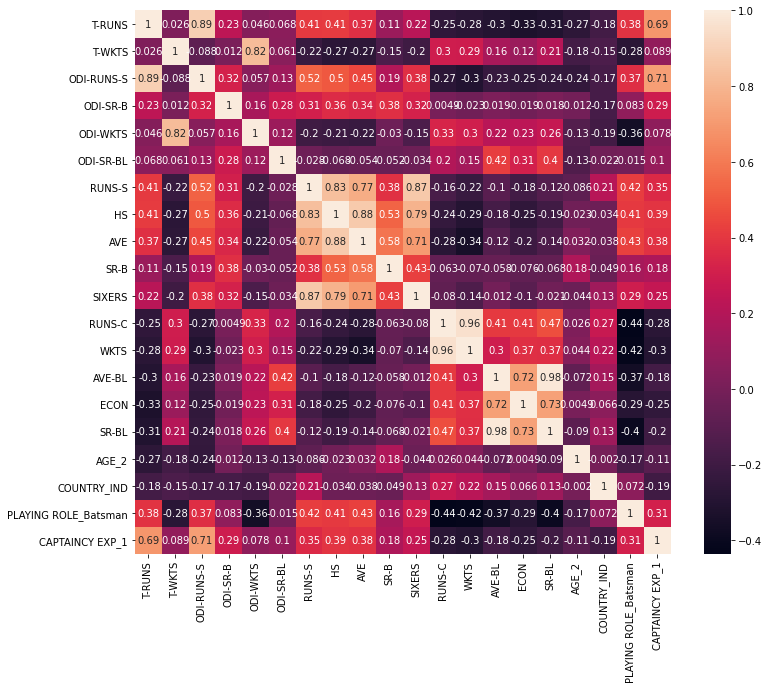

In [70]:
plt.figure( figsize= (12,10))
sn.heatmap(X[columns_with_large_vif].corr() , annot = True)

In [71]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS',
'AVE', 'RUNS-C', 'SR-B', 'AVE-BL',
'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [72]:
X_new_features = list(set(X_features) - set(columns_to_be_removed))

In [73]:
get_vif_factors(X[X_new_features])

column       VIF
0              COUNTRY_BAN  1.094293
1                    AGE_3  1.779861
2                ODI-SR-BL  2.822148
3               COUNTRY_NZ  1.173418
4              COUNTRY_PAK  1.334773
5               COUNTRY_SL  1.519752
6              COUNTRY_ZIM  1.205305
7                   SIXERS  2.397409
8                 ODI-WKTS  2.742889
9      PLAYING ROLE_Bowler  3.060168
10              COUNTRY_WI  1.194093
11  PLAYING ROLE_W. Keeper  1.900941
12             COUNTRY_ENG  1.131869
13                    WKTS  2.883101
14    PLAYING ROLE_Batsman  2.680207
15              COUNTRY_SA  1.416657
16             COUNTRY_IND  3.144668
17         CAPTAINCY EXP_1  2.458745

In [74]:
X_new_features

['COUNTRY_BAN',
 'AGE_3',
 'ODI-SR-BL',
 'COUNTRY_NZ',
 'COUNTRY_PAK',
 'COUNTRY_SL',
 'COUNTRY_ZIM',
 'SIXERS',
 'ODI-WKTS',
 'PLAYING ROLE_Bowler',
 'COUNTRY_WI',
 'PLAYING ROLE_W. Keeper',
 'COUNTRY_ENG',
 'WKTS',
 'PLAYING ROLE_Batsman',
 'COUNTRY_SA',
 'COUNTRY_IND',
 'CAPTAINCY EXP_1']

In [75]:
train_X = train_X[X_new_features]
ipl_model_2 = sm.OLS(train_y, train_X).fit()

In [76]:
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2023-09-12 16:11   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [77]:
significant_vars = ['COUNTRY_IND','COUNTRY_ENG','SIXERS','CAPTAINCY EXP_1']

In [78]:
train_X = train_X[significant_vars]


In [79]:
ipl_model_3 = sm.OLS(train_y , train_X).fit()

In [80]:
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2023-09-12 16:11 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

# transforming response variable

In [81]:
'''
transformation in MLR is used to address the following issues
1. poor fit ( low r-squared error)
2. residuals do not follow a normal distribution
3. residuals are not homoscedastic
4. found that that there is non linear relationship between independent and dependent variables
'''

'\ntransformation in MLR is used to address the following issues\n1. poor fit ( low r-squared error)\n2. residuals do not follow a normal distribution\n3. residuals are not homoscedastic\n4. found that that there is non linear relationship between independent and dependent variables\n'

In [82]:
import numpy as np
train_y = np.sqrt(train_y)
train_y

70     806.225775
78     308.220700
47     724.568837
0      223.606798
12     632.455532
          ...    
71     894.427191
106    570.087713
14     547.722558
92     474.341649
102    316.227766
Name: SOLD PRICE, Length: 104, dtype: float64

In [83]:
ipl_model_4 = sm.OLS(train_y,train_X).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2023-09-12 16:11 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

# Making predictions on the validation set

In [84]:

predictions = ipl_model_4.predict(test_X[train_X.columns])
predictions


55       51.202584
40      516.310183
19      298.681739
31       25.601292
115      42.668820
56       76.803876
69        0.000000
105     490.708891
81      780.856866
26     1518.613099
95      499.242655
27      682.304230
64      516.310183
4       729.654282
97     1190.477536
100       8.533764
36       93.871404
80      601.647822
93     1582.633791
84      486.027659
18     1104.743009
10      324.283031
120     434.825075
11      417.757547
126     417.757547
45       68.270112
dtype: float64

In [85]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_y, predictions))
print('MSE:', metrics.mean_squared_error(test_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))

MAE: 514886.16203879216
MSE: 401103580379.80426
RMSE: 633327.3879912382
